In [29]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import make_scorer, mean_squared_error
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from tqdm import tqdm
import seaborn as sns
from rich.console import Console
from rich.table import Table

sns.set(
    context="notebook",
    style="whitegrid",
    rc={"figure.dpi": 120, "scatter.edgecolors": "k"},
)


# Aufgabe 5 Decision Tree vs. Random Forest

### Hilfsmethoden

In [30]:
def compute_accuracy(arr: np.ndarray) -> float:
  return round(arr.mean() * 100, 2)


def compute_rmse(arr: np.ndarray) -> float:
  return round(np.sqrt(arr.mean()), 2)

def print_scores(tbl_name: str, model_scores: list[tuple[str,np.ndarray]], rmse: bool = False):
  table = Table(title=tbl_name)

  table.add_column("Model", style="green")
  table.add_column(f"Train {'RMSE' if rmse else 'Accuracy (%)'}", style="cyan", no_wrap=True)
  table.add_column(f"Test {'RMSE' if rmse else 'Accuracy (%)'}", style="cyan")

  for name, score in model_scores:
    if rmse:
      table.add_row(name, str(compute_rmse(score["train_score"])), str(compute_rmse(score["test_score"])))
    else:
      table.add_row(name, str(compute_accuracy(score["train_score"])), str(compute_accuracy(score["test_score"])))

  console = Console()
  console.print(table)



def plot_accuracy(xs: range, accuracies: np.ndarray, xlabel: str, ylabel="Accuracy") -> None:
    """Plot results for the given accuracies."""
    acc_train = accuracies[:, 0]
    acc_test = accuracies[:, 1]
    plt.figure()
    plt.plot(xs, acc_train, label="Train", linestyle="--")
    plt.plot(xs, acc_test, label="Test", linestyle="--")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(xs[::5])
    plt.legend()
    plt.show()


### 1a) Decision Tree vs. Random Forest (diskret)

Implementieren Sie die Funktion `cross_val_dt_rt`, welche eine 10-fache Kreuzvalidierung für einen
[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) mit Standardparametern und [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) mit 20 Schätzern
durchführt. Sie können dabei die Funktion [sklearn.model_selection.cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) verwenden.
Abschließend sollen die Genauigkeitsscores zurückgegeben werden.


In [31]:
def cross_val_dt_rt(load_fun) -> tuple[dict, dict]:
    """Conducts a 10-fold cross validation for a decision tree and random forrest and
     returns their accuracy scores given an sklearn discrete dataset loader function."""
    # Load data
    X, y = load_fun(return_X_y=True)
    # Cross-validate Decision Tree and Random Forest
    # FILL HERE

    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier(n_estimators=20)

    scores_dt = cross_validate(
        estimator=dt, X=X, y=y, scoring="accuracy", cv=10, return_train_score=True, n_jobs=-1
        )
    scores_rf= cross_validate(
        estimator=rf, X=X, y=y, scoring="accuracy", cv=10, return_train_score=True,n_jobs=-1
        )



    return scores_dt, scores_rf

In [32]:
np.random.seed(0)
scores_dt, scores_rf = cross_val_dt_rt(datasets.load_iris)

print_scores("Dataset Iris", [("Decision Tree", scores_dt), ("Random Forest", scores_rf)])


                       Dataset Iris                       
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Model         ┃ Train Accuracy (%) ┃ Test Accuracy (%) ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Decision Tree │ 100.0              │ 96.0              │
│ Random Forest │ 99.85              │ 96.0              │
└───────────────┴────────────────────┴───────────────────┘

### 1b) Decision Tree vs. Random Forest (kontinuierlich)

Führen Sie eine 10-fache Kreuzvalidierung in der Funktion `cross_val_dt_rf_continuous` für kontinuierliche
Zielvariablen durch. Es sollen hierbei erneut 20 Schätzer verwendet werden und die mittlere quadratische Abweichung
als Metrikscore zurückgegeben werden.\

In [33]:
def cross_val_dt_rf_continuous(load_fun) -> tuple[dict, dict]:
    """Conducts a 10-fold cross validation for a decision tree and random forrest and
     returns their mse scores given an sklearn discrete dataset loader function."""
    # Load data

    X, y = load_fun(return_X_y=True)
    dt = DecisionTreeRegressor()
    rf = RandomForestRegressor(n_estimators=20)


    scores_dt = cross_validate(
        estimator=dt, X=X, y=y, scoring=make_scorer(mean_squared_error), cv=10, return_train_score=True,n_jobs=-1
        )
    scores_rf= cross_validate(
        estimator=rf, X=X, y=y, scoring=make_scorer(mean_squared_error), cv=10, return_train_score=True,n_jobs=-1
        )

    # Cross-validate Decision Tree and Random Forest
    # FILL HERE




    return scores_dt, scores_rf


In [34]:
np.random.seed(0)

scores_dt, scores_rf = cross_val_dt_rf_continuous(datasets.load_diabetes)

print_scores("Dataset Diabetes", [("Decision Tree", scores_dt), ("Random Forest", scores_rf)],rmse=True)


             Dataset Diabetes             
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Model         ┃ Train RMSE ┃ Test RMSE ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ Decision Tree │ 0.0        │ 82.02     │
│ Random Forest │ 23.29      │ 60.2      │
└───────────────┴────────────┴───────────┘

In [35]:
# Run on multiple datasets

# Get the data loader
loader_classification = [
  ("Iris", datasets.load_iris),
  ("Digits", datasets.load_digits),
  ("Wine", datasets.load_wine),
  ("Breast Cancer", datasets.load_breast_cancer),
]
loader_regression = [
  # ("Boston", datasets.load_boston),
  ("Diabetes", datasets.load_diabetes),
  ("Linnerud", datasets.load_linnerud),
]

# Set seed for reproducibility
np.random.seed(0)

# For each classification dataset evaluate:
for name, load_fun in loader_classification:
  scores_dt, scores_rf = cross_val_dt_rt(load_fun)

  print_scores(f"Dataset {name}", [("Decision Tree", scores_dt), ("Random Forest", scores_rf)])


# For each regression dataset evaluate:
for name, load_fun in loader_regression:
  scores_dt, scores_rf = cross_val_dt_rf_continuous(load_fun)

  print_scores(f"Dataset {name}", [("Decision Tree", scores_dt), ("Random Forest", scores_rf)], rmse=True)




                       Dataset Iris                       
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Model         ┃ Train Accuracy (%) ┃ Test Accuracy (%) ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Decision Tree │ 100.0              │ 96.0              │
│ Random Forest │ 99.78              │ 96.67             │
└───────────────┴────────────────────┴───────────────────┘

                      Dataset Digits                      
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Model         ┃ Train Accuracy (%) ┃ Test Accuracy (%) ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Decision Tree │ 100.0              │ 81.97             │
│ Random Forest │ 99.99              │ 93.49             │
└───────────────┴────────────────────┴───────────────────┘

                       Dataset Wine                       
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Model         ┃ Train Accuracy (%) ┃ Test Accuracy (%) ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Decision Tree │ 100.0              │ 86.5              │
│ Random Forest │ 100.0              │ 98.89             │
└───────────────┴────────────────────┴───────────────────┘

                  Dataset Breast Cancer                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Model         ┃ Train Accuracy (%) ┃ Test Accuracy (%) ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Decision Tree │ 100.0              │ 91.39             │
│ Random Forest │ 99.92              │ 95.26             │
└───────────────┴────────────────────┴───────────────────┘

             Dataset Diabetes             
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Model         ┃ Train RMSE ┃ Test RMSE ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ Decision Tree │ 0.0        │ 81.6      │
│ Random Forest │ 23.26      │ 59.45     │
└───────────────┴────────────┴───────────┘

             Dataset Linnerud             
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Model         ┃ Train RMSE ┃ Test RMSE ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ Decision Tree │ 0.0        │ 19.95     │
│ Random Forest │ 6.49       │ 16.38     │
└───────────────┴────────────┴───────────┘

### 2a) Anzahl der Bäume

Der wichtigste Parameter eines Zufallswaldes ist seine Ensemblegröße, d.h. wie viele Entscheidungsbäume verwendet
werden, um eine Mehrheitsabstimmung für die Entscheidung durchzuführen. Beginnen wir mit dem Zifferndatensatz
und zeigen wir den Einfluss der Ensemblegröße auf die Klassifikationsgenauigkeit.
Um den Einfluss der Anzahl der Bäume zu sehen, werden wir jeden Wert im Intervall n ∈ [1, · · · , 40] kreuzvalidieren
und ein RandomForestClassifier-Modell mit n-Entscheidungsbäumen erstellen. Evaluieren Sie die Anzahl der
Schätzer in Funktion evaluate_n_estimators mittels einer 10-fachen Kreuzvalidierung und geben sie die mittlere
Trainings- und Testgenauigkeit zurück.





100%|██████████| 40/40 [00:21<00:00,  1.82it/s]


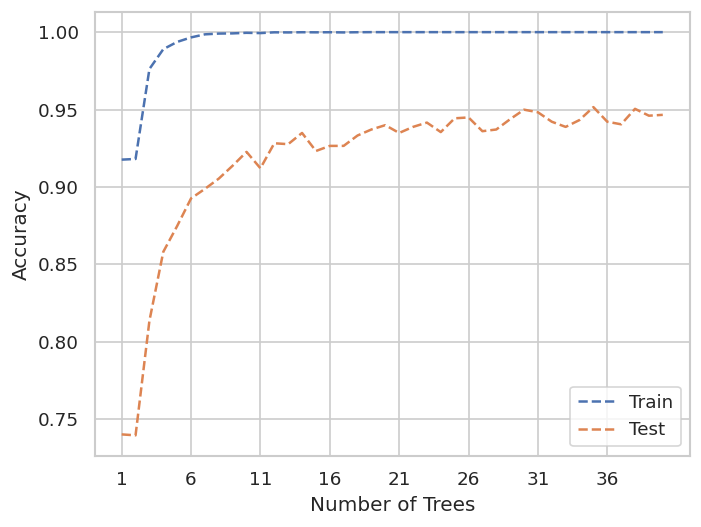

In [37]:
def evaluate_n_estimators(X: np.ndarray, y: np.ndarray, n: int) -> tuple[float, float]:
    """"Run 10 fold cross-validation of the model for a given number of trees and returns the
    mean train and test score."""
    scores = cross_validate(
        estimator=RandomForestClassifier(n_estimators=n), X=X, y=y, scoring="accuracy", cv=10, return_train_score=True, n_jobs=-1
        )
    return np.mean(scores["train_score"]), np.mean(scores["test_score"])
X, y = load_digits(return_X_y=True)


# Define interval
n_estimators = range(1, 41)

# Evaluate interval
accuracies_n_est = np.array([evaluate_n_estimators(X, y, alpha) for alpha in tqdm(n_estimators)])

plot_accuracy(n_estimators, accuracies_n_est, "Number of Trees")

### 2c) Maximale Baumtiefe

Ein weiterer interessanter Aspekt, den es zu betrachten gilt, ist die Komplexität der Entscheidungsbäume. Wir können
den Einfluss der Komplexität der Lerner auf die Leistung des Ensembles untersuchen, indem wir das obige Experiment
wiederholen, aber statt mit einer unterschiedlichen Anzahl von Bäumen zu evaluieren, werden wir diesmal die
maximale Baumtiefe für jeden Baum mit einer festen Anzahl von Bäumen ändern.
Führen Sie eine 10-fache Kreuzvalidierung für gegebene Baumtiefe mit 20 Schätzern in der Funktion
`evaluate_depth` durch.



100%|██████████| 14/14 [00:06<00:00,  2.31it/s]


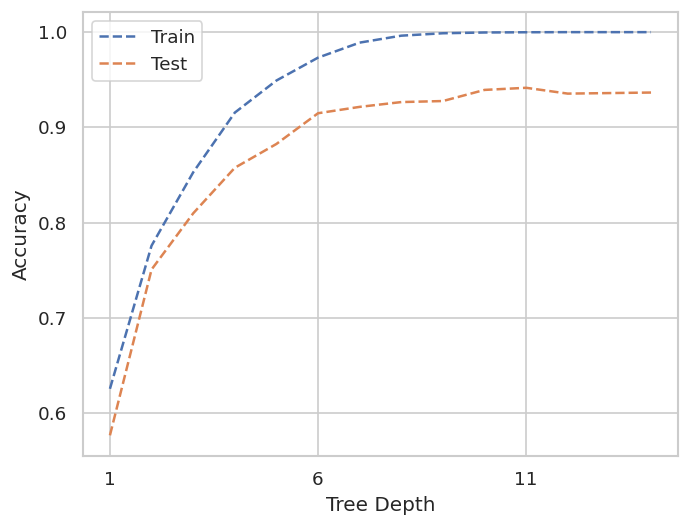

In [38]:
def evaluate_depth(X: np.ndarray, y: np.ndarray, depth: int) -> tuple[float, float]:
    """Run 10 fold cross-validation of the model for a given tree depth and returns the
    mean train and test score."""
    scores= cross_validate(
        estimator=RandomForestClassifier(n_estimators=20, max_depth=depth), X=X, y=y, scoring="accuracy", cv=10, return_train_score=True, n_jobs=-1
        )
    return np.mean(scores["train_score"]), np.mean(scores["test_score"])


X, y = load_digits(return_X_y=True)
# Define interval
depths = range(1, 15)

# Evaluate interval
accuracies_depths = np.array([evaluate_depth(X, y, d) for d in tqdm(depths)])
# Plot results
plot_accuracy(depths, accuracies_depths, "Tree Depth")


### 2e) Anzahl der Merkmale


Evaluieren Sie den den Einfluss dieses Parameters, indem Sie eine 10-fache Kreuzvalidierung mit 20 Schätzern für alle
mögliche Anzahl von Merkmalen im Zifferndatensatz in der Funktion evaluate_features durchführen


100%|██████████| 63/63 [01:11<00:00,  1.13s/it]


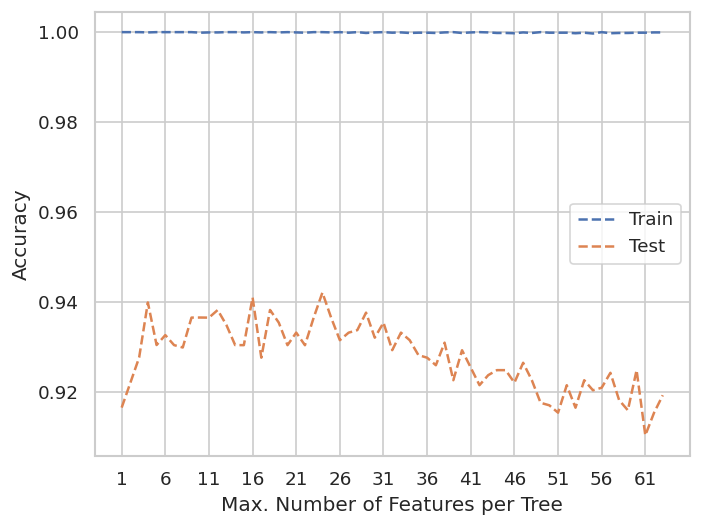

In [39]:
def evaluate_features(X: np.ndarray, y: np.ndarray, n_features: int) -> tuple[float, float]:
    """"Run 10 fold cross-validation of the model for a given number of features per tree and returns the
    mean train and test score."""
    model = RandomForestClassifier(max_features=n_features, n_estimators=20)
    scores = cross_validate(
        estimator=model, X=X, y=y, scoring="accuracy", cv=10, return_train_score=True, n_jobs=-1,
    )
    return np.mean(scores["train_score"]), np.mean(scores["test_score"])

# Define interval
n_features = range(1, X.shape[1], 1)

# Evaluate interval
accuracies_n_feat = np.array([evaluate_features(X, y, n) for n in tqdm(n_features)])

# Plot results
plot_accuracy(n_features, accuracies_n_feat, "Max. Number of Features per Tree")